In [1]:
import numpy as np
from keras.models import load_model
from scipy.signal import spectrogram, get_window
from scipy.io import wavfile
import os
import IPython
from pydub import AudioSegment
import matplotlib.pyplot as plt
%matplotlib inline
np.seterr(divide = 'ignore');
from td_utils import *

Using TensorFlow backend.
C:\Users\epour\Anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
model = load_model("model.h5")





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
len_input = 2204   
num_freq = 201            # sampling rate
nfft = 2*(num_freq-1)     # window for fft
noverlap = 200            # overlap of fft
len_output = 550          # length of output sequense

In [4]:
def detect_activation(test_case, threshold):
    
    fs, data = wavfile.read(test_case)
#     f, t, fft = spectrogram(data,fs=rate,window=get_window('hann',window),    
#                           noverlap=noverlap,scaling='spectrum',nperseg=window)
    plt.subplot(2, 1, 1)
    fft, f, t, fig = plt.specgram(data, nfft, fs, noverlap = noverlap);      
    #plt.pcolormesh(t, f, 10*np.log10(fft))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    
    #fft = 10*np.log10(fft); 
    fft = fft.T
    fft = np.expand_dims(fft, axis=0)  
    output = model.predict(fft)
    
    over_threshold=0
    detected = []
    for i in range(len_output):
        if output[0,i,0] >= threshold:
            over_threshold += 1
        elif output[0,i,0] < threshold and over_threshold > 0:
            detected.append(int(i-over_threshold/2))
            over_threshold = 0
                    
    plt.subplot(2, 1, 2)
    plt.plot(output[0,:,0])
    for i in range(len(detected)):
        plt.annotate('detection', xy=(detected[i], threshold+0.1), xytext=(detected[i], threshold+0.35),
             arrowprops=dict(facecolor='black', shrink=0.05))
    plt.ylabel('Probability')
    plt.xlabel('Steps')
    plt.xlim(0, len_output)
    plt.ylim(0, 1)
    plt.show()
    
    return output

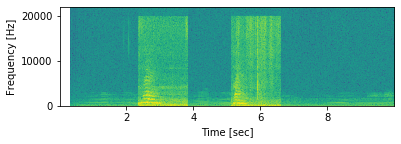

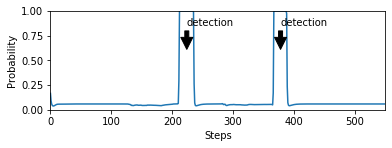

In [8]:
test_case = "./train/test4.wav"
threshold = 0.5
prediction = detect_activation(test_case, threshold)
IPython.display.Audio(test_case)